# Análise Exploratória com Python: 


A análise exploratória em Python é essencial para compreender, visualizar e resumir dados de maneira eficaz. Ela ajuda a identificar padrões, relações e insights iniciais, além de detectar valores atípicos e verificar a qualidade dos dados. Através de gráficos, estatísticas e visualizações, a análise exploratória fornece uma base sólida para a tomada de decisões informadas, direcionando análises posteriores e a construção de modelos mais precisos.

Neste Notebook, iremos realizar uma análise exploratória com Python, utilizando um Dataset do Kaggle sobre empresas unicórnios. Vamos tentar extrair informações dos dados, de modo que possamos entender mais sobre essas empresas. 


* Empresas Unicórnio: 

Empresas "unicórnio" são empresas de tecnologia privadas e emergentes que atingiram uma avaliação de mercado de pelo menos 1 bilhão de dólares antes de se tornarem públicas (ou seja, antes de abrirem capital na bolsa de valores). O termo "unicórnio" foi cunhado por Aileen Lee, fundadora da empresa de capital de risco Cowboy Ventures, em 2013.

O nome "unicórnio" é usado para destacar o fato de que essas empresas são raras, assim como os unicórnios mitológicos. Essas empresas muitas vezes chamam a atenção devido ao rápido crescimento, à inovação disruptiva e ao potencial de transformar indústrias inteiras.

In [71]:
# Importando as bibliotecas: 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import numpy as np


In [57]:
#Importando o arquivo: 

df_unicornios = pd.read_csv("unicorns till sep 2022.csv")

In [58]:
#Visualizando as primeiras linhas do dataset:

df_unicornios.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


Atráves das primeiras linhas do nosso dataset é possível verificar que ele se trata de empresas que tem um alto valor no mercado, estão incluidas neste dataset as famosas, SpaceX, SHEIN, Canva entre outras. Além disso, podemos avaliar o valor em Bilhões da empresa, pois são as famosas unicornios, também temos informações da data de ínicio da empresa e de país e cidade das empresas, a indústria da qual pertecem e também seus investidores.

In [59]:
#Obtendo informações sobre as colunas:
df_unicornios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [60]:
# Remover o símbolo '$' e qualquer outro caractere não numérico
df_unicornios['Valuation ($B)'] = df_unicornios['Valuation ($B)'].replace('[\$,]', '', regex=True).astype(float)

# Agora a coluna 'Valuation ($B)' contém valores numéricos
print(df_unicornios['Valuation ($B)'])


0       140.0
1       127.0
2       100.0
3        95.0
4        40.0
        ...  
1181      1.0
1182      1.0
1183      1.0
1184      1.0
1185      1.0
Name: Valuation ($B), Length: 1186, dtype: float64


In [61]:
df_unicornios.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [62]:
maior_valor = df_unicornios['Valuation ($B)'].max()
print("Maior Valor: $B", round(maior_valor, 2), )
menor_valor = df_unicornios['Valuation ($B)'].min()
print("Menor Valor: $B", round(menor_valor, 2))
media_valor = df_unicornios['Valuation ($B)'].mean()
print("Média: $B", round(media_valor, 2))
mediana_valor = df_unicornios['Valuation ($B)'].median()
print("Mediana: $B", round(mediana_valor,2))
desvio_padrao = df_unicornios['Valuation ($B)'].std()
print("Desvio Padrão: $B", (desvio_padrao))


Maior Valor: $B 140.0
Menor Valor: $B 1.0
Média: $B 3.25
Mediana: $B 1.6
Desvio Padrão: $B 7.6415742657531345


# Concentração de empresas por Valores:

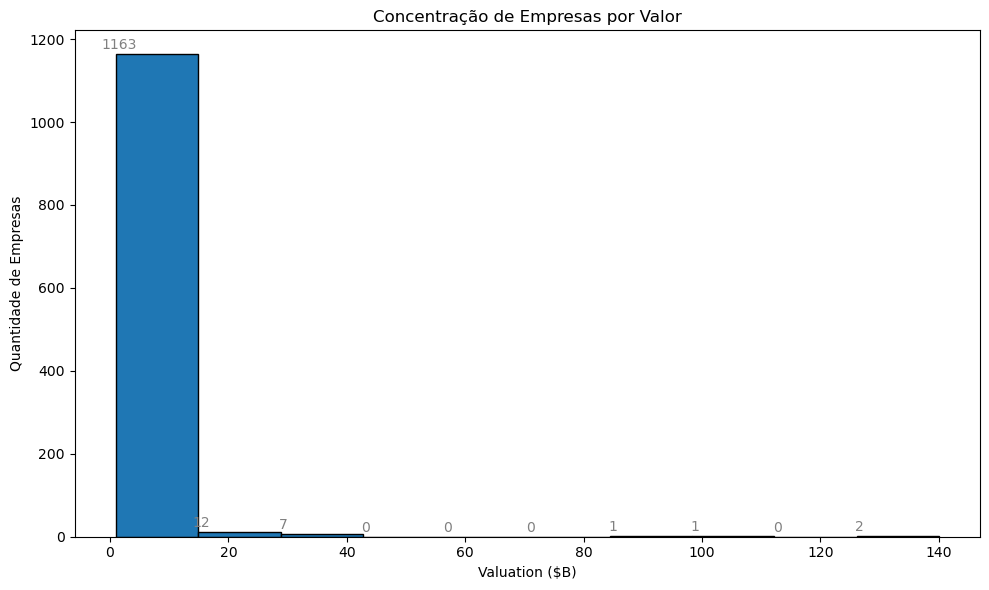

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Cria o histograma usando o matplotlib
hist_values, bins, _ = plt.hist(df_unicornios['Valuation ($B)'], bins=10, edgecolor='black')

plt.xlabel('Valuation ($B)')
plt.ylabel('Quantidade de Empresas')
plt.title('Concentração de Empresas por Valor')

# Adiciona os valores acima das barras do histograma
for value, count, bin_edge in zip(hist_values, hist_values, bins[:-1]):
    plt.text(bin_edge + 0.5, value + 5, str(int(count)), ha='center', va='bottom', fontsize=10, color='gray')

plt.tight_layout()
plt.show()



O histograma apresentado oferece uma visão perspicaz da distribuição de avaliações das empresas contidas em nosso conjunto de dados. Observamos que a maioria das empresas é avaliada entre 1 e 18 bilhões de dólares, uma faixa que parece englobar a maioria das organizações. Entretanto, chama a atenção o fato de que apenas duas empresas se destacam, estando avaliadas entre 120 e 140 bilhões de dólares. Este contraste aponta para uma possível concentração de valor nessas empresas excepcionais, que podem estar à frente no quesito de influência no mercado.

Intrigada por essa constatação, decidi explorar ainda mais essa dinâmica. Optei por traçar um gráfico de barras que destaque as empresas com os valores mais elevados, uma abordagem que certamente proporcionará uma visão mais detalhada das organizações que lideram em termos de avaliação. Essa análise mais profunda nos permitirá compreender quais empresas estão efetivamente liderando o panorama empresarial em termos de avaliação financeira.


# Top 10 empresas com maior valor:


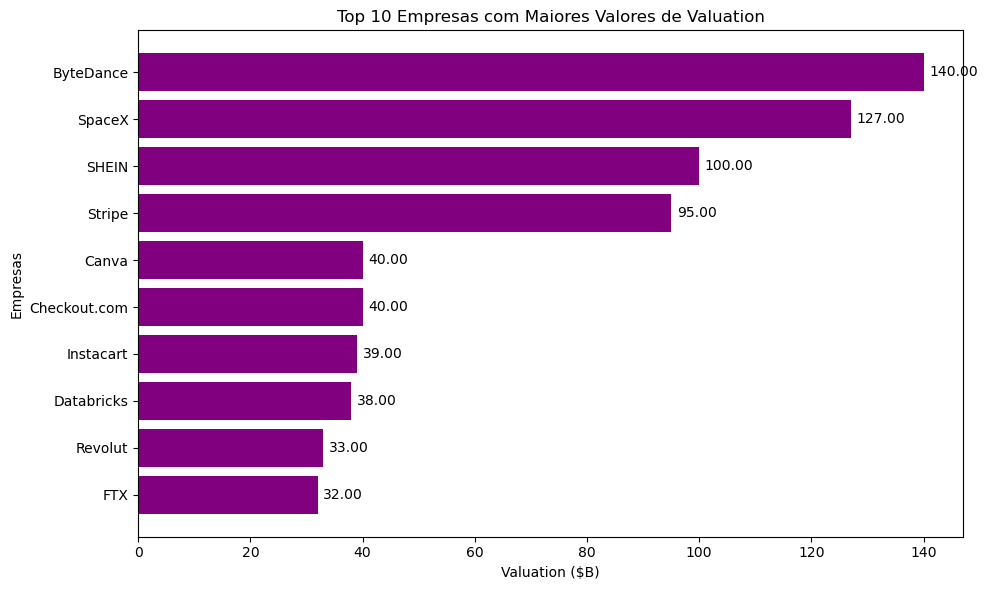

In [64]:


# Ordena o DataFrame pelas maiores valores de Valuation
df_sorted = df_unicornios.sort_values(by='Valuation ($B)', ascending=False)

# Seleciona as top 10 empresas com os maiores valores de Valuation para plotar
top_n = 10  # Escolha o número de empresas que você deseja plotar
top_companies = df_sorted.head(top_n)

plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Cria o gráfico de barras verticais decrescente usando o matplotlib
plt.barh(top_companies['Company'], top_companies['Valuation ($B)'], color='purple')

plt.xlabel('Valuation ($B)')
plt.ylabel('Empresas')
plt.title(f'Top {top_n} Empresas com Maiores Valores de Valuation')

# Inverte a ordem do eixo y para que as empresas com maiores valores fiquem no topo
plt.gca().invert_yaxis()

# Adiciona legendas para as barras
for index, value in enumerate(top_companies['Valuation ($B)']):
    plt.text(value + 1, index, f'{value:.2f}', va='center', color='black')

plt.tight_layout()
plt.show()


No gráfico fornecido, destacam-se as dez empresas mais valorizadas, representando um panorama impactante do cenário empresarial. Sobressai a empresa ByteDance, que lidera com uma avaliação impressionante de 140 bilhões de dólares, uma marca que reflete sua significativa influência no mercado. Em sequência, a renomada SpaceX, fundada por Elon Musk, estabelece-se como um nome de peso, comprovando a revolução que a exploração espacial representa. Na esteira dessas líderes, a SHEIN também marca presença, trazendo à tona o crescente domínio do comércio eletrônico e da abordagem direta ao consumidor. 

# Distribuição de Empresas por Indústria:

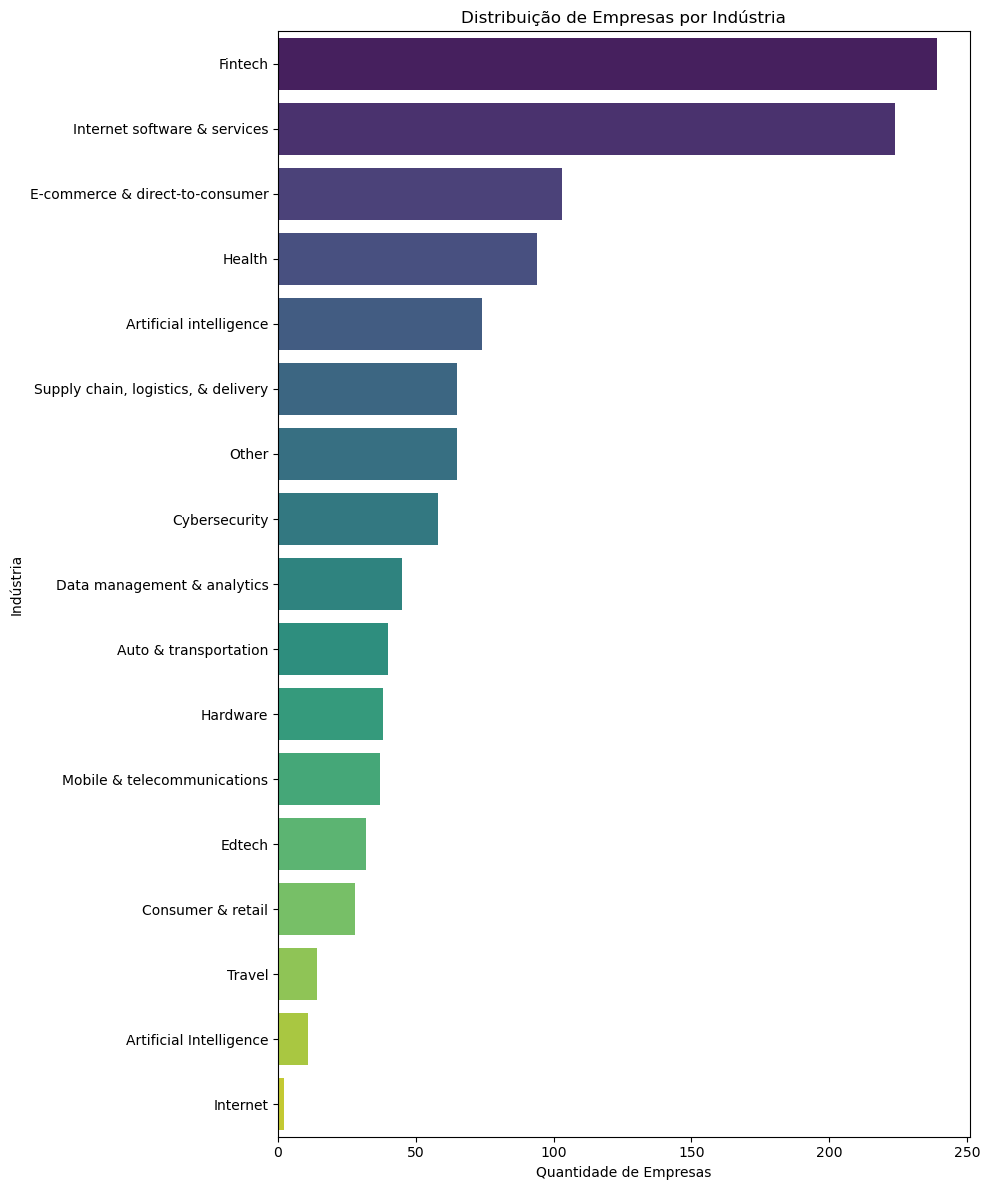

In [65]:
plt.figure(figsize=(10, 12))  # Define o tamanho da figura



# Cria o gráfico de barras decrescente usando o seaborn, aqui nós limitamos em 17 indpustrias  pq as outras vieram práticamente vazias.
sns.countplot(y='Industry', data=df_unicornios, order=df_unicornios['Industry'].value_counts().head(17).index, palette='viridis')

plt.xlabel('Quantidade de Empresas')
plt.ylabel('Indústria')
plt.title('Distribuição de Empresas por Indústria')

plt.tight_layout()
plt.show()

A análise do gráfico revela uma interessante distribuição das empresas unicórnios presentes em nosso conjunto de dados. Notavelmente, a maioria dessas empresas está situada na indústria de Fintechs, sugerindo a crescente influência e inovação nesse setor. Em sequência, encontramos um número significativo de empresas atuando na indústria de Softwares, evidenciando a importância contínua da tecnologia e do desenvolvimento de software nesse ecossistema. Além disso, a indústria de E-commerce também se destaca, ressaltando a tendência do comércio eletrônico como um impulsionador-chave do sucesso empresarial. 

Podemos fazer essa análise também para o país, e analisar quais países possuem mais empresas unicornios:


# A distribuição de empresas unicórnios por País. 

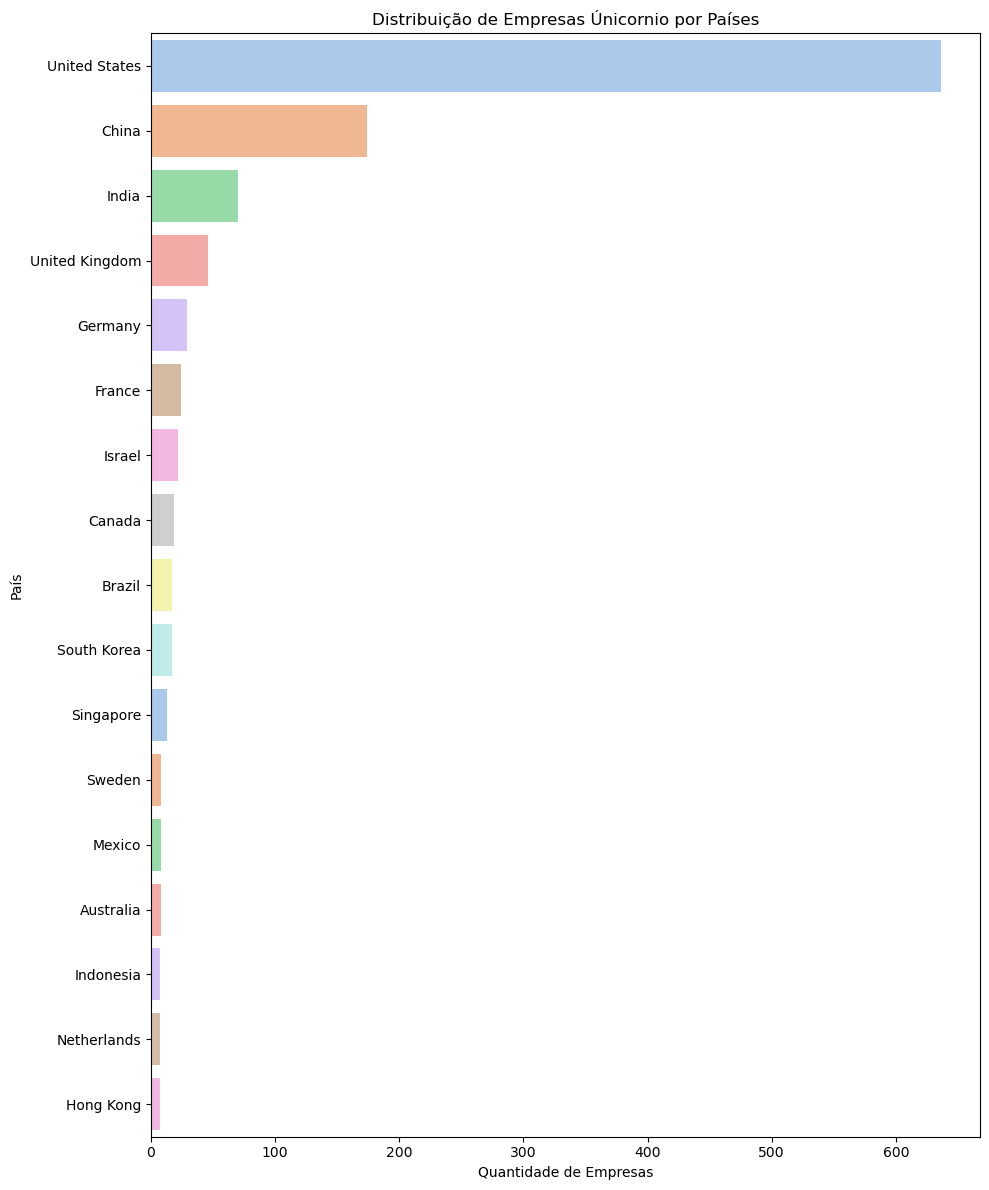

In [66]:
plt.figure(figsize=(10, 12))  # Define o tamanho da figura



# Cria o gráfico de barras decrescente usando o seaborn, aqui nós limitamos em 17 indpustrias  pq as outras vieram práticamente vazias.
sns.countplot(y='Country', data=df_unicornios, order=df_unicornios['Country'].value_counts().head(17).index, palette='pastel')

plt.xlabel('Quantidade de Empresas')
plt.ylabel('País')
plt.title('Distribuição de Empresas Únicornio por Países')

plt.tight_layout()
plt.show()

O gráfico de barras em questão proporciona uma visão panorâmica da distribuição das empresas unicórnios por país de origem. A análise desse gráfico revela uma notável disparidade entre as nações. Os Estados Unidos dominam com uma presença avassaladora, indicando uma concentração significativa de "bigtechs" nesse território. A presença robusta de empresas de tecnologia em solo americano ressalta a liderança desse país no cenário tecnológico global.

Em sequência, observamos a China e a Índia, embora em menor proporção, como países que também contribuem para a comunidade de empresas unicórnios. Essa presença destaca o crescimento acelerado e o potencial desses mercados emergentes.

Não menos importante, é interessante enfatizar a presença do Brasil, que se posiciona em nono lugar no ranking. Esta colocação, à frente da Coreia do Sul, sinaliza o progresso do Brasil no campo das empresas de tecnologia e o seu papel em contribuir para o cenário de startups globais.

Nós podemos agora identificar os investidores mais frequentes: 

In [73]:

# Tratar valores ausentes substituindo-os por uma string vazia
df_unicornios['Investors'] = df_unicornios['Investors'].fillna('')


In [74]:
# Concatenar todos os investidores em uma única string e dividir em substrings
investors_combined = ','.join(df_unicornios['Investors'])
investors_list = investors_combined.split(',')

In [75]:
# Usar o Counter para contar a frequência de cada investidor
investor_counts = Counter(investors_list)

# Selecionar os 10 investidores mais frequentes
top_investors = investor_counts.most_common(10)

# Criar o gráfico de barras para os 10 investidores mais frequentes
investor_names, investor_counts = zip(*top_investors)

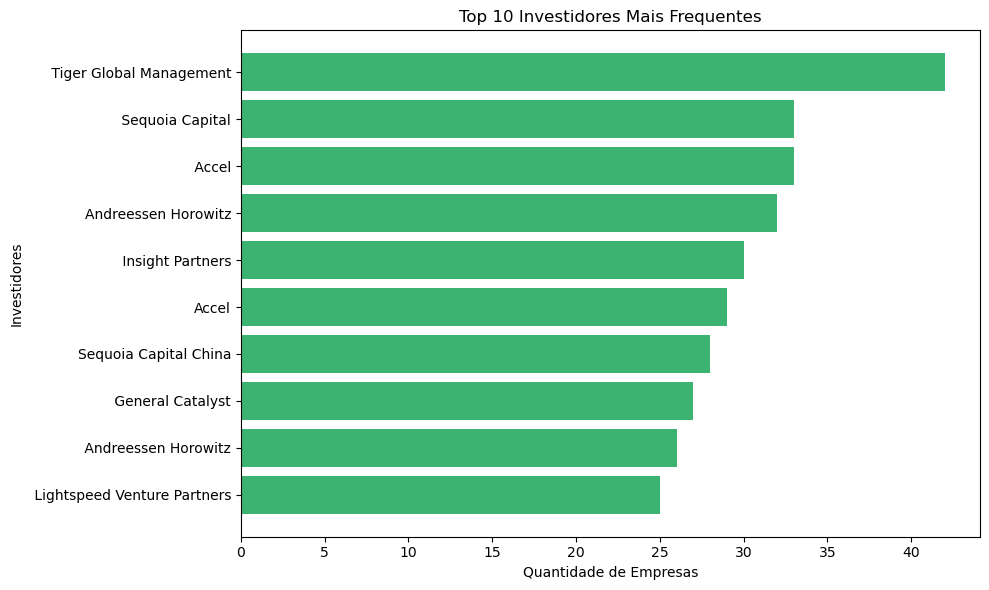

In [78]:

plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Criar o gráfico de barras usando o matplotlib
plt.barh(investor_names, investor_counts, color='mediumseagreen')

plt.xlabel('Quantidade de Empresas')
plt.ylabel('Investidores')
plt.title('Top 10 Investidores Mais Frequentes')

plt.gca().invert_yaxis()  # Inverter a ordem do eixo y para os investidores mais frequentes no topo

plt.tight_layout()
plt.show()


A análise dos investidores mais frequentes oferece uma visão intrigante sobre as parcerias estratégicas e os financiamentos por trás das empresas unicórnios. Através dessa análise, identificamos os players-chave que têm desempenhado um papel fundamental na promoção do sucesso e do crescimento dessas empresas inovadoras.

Observando o gráfico de barras que destaca os investidores mais frequentes, fica evidente que alguns nomes ressoam de maneira consistente. Investidores como Sequoia Capital, Tiger Global Management e Founders Fund emergem como participantes ativos em múltiplas empresas unicórnios. Essa repetição sugere não apenas sua capacidade de identificar oportunidades promissoras, mas também sua capacidade de influenciar e moldar a trajetória dessas empresas.

# Conclusões: 

Com base nas análises exploratórias realizadas neste conjunto de dados sobre empresas unicórnios, é possível tirar algumas conclusões significativas:

**Diversidade de Indústrias**: O conjunto de dados reflete a diversidade de indústrias que abrigam empresas unicórnios, com Fintechs, Softwares e E-commerce emergindo como as principais. Isso sugere a importância contínua desses setores na inovação e no crescimento empresarial.

**Influência dos Investidores**: A análise dos investidores mais frequentes revela a importância dos investidores-chave que desempenham um papel crucial na trajetória das empresas unicórnios. Nomes como Sequoia Capital, Tiger Global Management e Founders Fund se destacam como parceiros frequentes.

**Potencial de Diversas Nações**: A presença do Brasil no nono lugar no ranking das empresas unicórnios mostra que o país está emergindo como um jogador promissor no cenário de startups de alto valor, à frente de economias consolidadas como a Coreia do Sul.

Em suma, este conjunto de dados nos forneceu uma visão fascinante das empresas unicórnios e suas características distintivas. As análises realizadas permitiram-nos identificar padrões, tendências e insights que contribuem para uma compreensão mais profunda do ecossistema empresarial de alto valor.